# Practical Work 2

- For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Multivariables) of a set of datapoints.
- We will do a vectorize implementation (Using Matrix vectors operations) which is the more general and effecient form of GD implementation.
- As we did with the single variable we will do step by step implementation then combine all steps togeteher then make a function for the Multivariables LR training using GD.

### Prerequisites:
- You should have seen <b>Day 1 and Day 2 as well as Day 3 Part 1</b> from our course <b><i>Master Numerical Optimization for Machine Learning and Deep Learning in 5 Days</b></i>.
- The course is available for free on our channel <b><i>Artificial Intelligence & Data Science شرح بالعربي</i></b>.
- Course link https://youtube.com/playlist?list=PLJM7jJIw2GC15hvIwN8sBXok__yLMcMxN&feature=shared

### Whatsapp Channel: 
https://whatsapp.com/channel/0029Va0cflnId7nVMfzByO3k

### Import numpy, matplotlib.pyplot

In [21]:
import numpy as np ,matplotlib.pyplot as plt,seaborn as sns ,plotly.express as px

### Read MultiVarLR.csv file into numpy array 

In [22]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [23]:
m=len(data)

In [24]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

### Define variables X and y. 
### Assign all columns data except the last one to X and last column to y
<b>Notes:</b> 
- We have here 3 independent variables and one dependent variable.
- Make sure <b>y</b> is a column vector to obtain correct matrix vector operations.

In [25]:
X=data[:,0:3]
print(X)
print(X.shape)


[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
(25, 3)


In [26]:
Y=data[:,3]
Y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [27]:
Y.shape
Y=Y.reshape(-1,1)
Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Add column of ones to the X data matrix to be X0 variable for theta0 parameters.
- The model has X1,X2, and X3 variables and theta0, theta1, theta3, and theta4 parameters. So, we need X0 for theta0 to have consistent <b>X matrix</b> dimensions.

In [40]:
ones_col= np.ones(  (m, 1))
X=data[:,0:3]
X= np.hstack(   (      ones_col , X      )   ) #or

x=data[:,0:3]
x=np.concatenate( (ones_col,x) ,axis=1 )   #25*4

x

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

### Step 1: Initialize model parameters as 4 by 1 column vector of zeros.

In [37]:
n_1=data.shape[1]
Th=np.zeros((n_1,1))
Th

array([[0.],
       [0.],
       [0.],
       [0.]])

### Step 2: Calculate model outpt y for all data points using matrix vector multiplication.
###  $$h(x) = X\theta$$

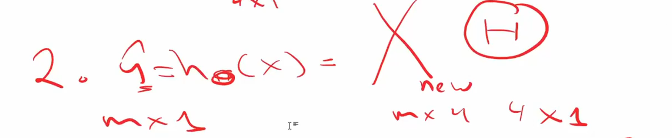

In [41]:
H=X@Th    #  25*4   @ 4*1 ==>    25*1
H

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step 3: Calculate the MSE Cost function.
- You should calculate the error vector first <b>e = h - y</b> then use it for cost function calculation.
- We will also need this error vector in gradient vector calculation.

In [ ]:
E=H-Y    #  25*1 -   25*1  ==>25*1 
print(H.shape,Y.shape)
E.shape

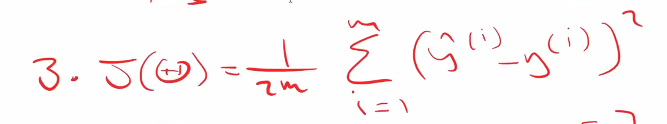

In [ ]:
j=np.linalg.norm(E)**2/(2*m)
j

### Step 4: Calculate the gradient vector
- In this step we will not calculate each gradient component for each parameter individually.
- We will use the error vector and calculate the gradient vector by multiplying the data matrix transpose with the error vector .
###  $$\nabla =\frac{X^Te}{m}$$

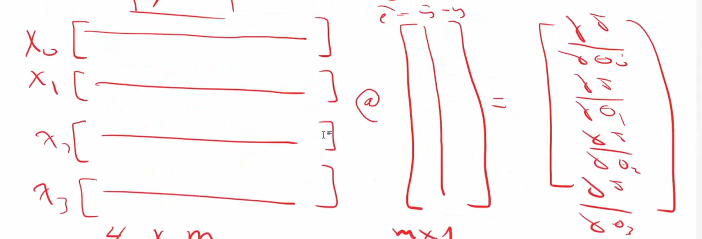

In [ ]:
grad=(X.T @E )/m    #  4*25 @  25*1 ==>4*1
grad

### Step 5: Check if gradient norm < critical value (stop condition) e.g. 0.1

In [ ]:
grad_norm=np.linalg.norm(grad)
print(grad_norm)

### Step6: Update the parameters (use 0.00001 learning rate)

In [ ]:
alpha=0.00001
print(Th)
print(grad)
Th=Th-(alpha*grad)
Th

### Step 7: Combine all the previous steps and iterate untill you reach the critical value of the gradient norm or cost convergence check .
- learning rate = 0.00001.
- Maximum number of iterations = 10000.
- Stop condition grad_norm < 0.1.
- Cost convergence check <b>abs(cost[i] - cost[i-1]) < 0.001 </b>

### In order to plot the learning curves you need to save thetas and cost each iteration.

In [44]:

m=data.shape[0] 
n_1=data.shape[1]
aplha=0.00001
max_iter=10000
grad_check=0.1
conv_check=0.001
th=np.zeros((4,1))
loss=[]
theats_arr=[]
for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=X@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)
    print(f"J = \n{j}")
    loss.append(j)
    grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  np.absolute(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    th=th-(aplha*grad)
    print(f"new_theats = \n{th}")
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.0016204]
 [0.130758 ]
 [0.131472 ]
 [0.1346708]]
****************** Iteration  1 ******************** 

 h(x) = 
[[30.1650244]
 [36.2560348]
 [35.7234064]
 [38.9057244]
 [27.6510624]
 [20.3864004]
 [29.122502 ]
 [21.5899264]
 [33.8842264]
 [31.3855728]
 [28.0579308]
 [27.6659996]
 [36.9069972]
 [30.6802308]
 [29.2564588]
 [36.7915192]
 [29.2187588]
 [34.9498828]
 [35.1854372]
 [31.482572 ]
 [34.1507404]
 [34.0132136]
 [32.5

New Thetas : [[0.00823727]
 [0.66059823]
 [0.66338057]
 [0.70093915]]

****************** Iteration 170 ********************

h(x):[[153.87278987]
 [185.00870374]
 [182.25363507]
 [198.53087816]
 [141.08076617]
 [104.0871029 ]
 [148.65199181]
 [110.26201492]
 [172.97187177]
 [160.31478247]
 [143.19471295]
 [141.23934748]
 [188.25048944]
 [156.43450099]
 [149.35014862]
 [187.77490174]
 [148.95230418]
 [178.40828606]
 [179.45266083]
 [160.56780105]
 [174.31254458]
 [173.6004761 ]
 [166.17531421]
 [155.04096971]
 [191.70927958]]

Error Vector:
[[ 1.87278987e+00]
 [ 8.70373781e-03]
 [ 2.25363507e+00]
 [ 2.53087816e+00]
 [-9.19233830e-01]
 [ 3.08710290e+00]
 [-3.48008194e-01]
 [-4.73798508e+00]
 [-2.02812823e+00]
 [-3.68521753e+00]
 [ 2.19471295e+00]
 [ 2.39347477e-01]
 [ 4.25048944e+00]
 [ 4.43450099e+00]
 [ 1.35014862e+00]
 [-4.22509826e+00]
 [ 1.95230418e+00]
 [-4.59171394e+00]
 [ 2.45266083e+00]
 [ 1.56780105e+00]
 [-2.68745542e+00]
 [-1.39952390e+00]
 [-8.82468579e+00]
 [ 6.04096971e+0

### Predict y values using the LR equation 
- Now we will use the obtained obtimum parameters <b>thetas</b> to make predition using the equation: 
###  $$h(x) = X\theta$$

In [ ]:
h=X@th
h

### Use R Squared metrics to evaluate LR equation output
- Can be found in <b>sklearn.metrics</b>

https://www.youtube.com/watch?v=KccCy0hu-dM

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(Y,h)

0.9797103568402049

### Plot loss vs. iterations

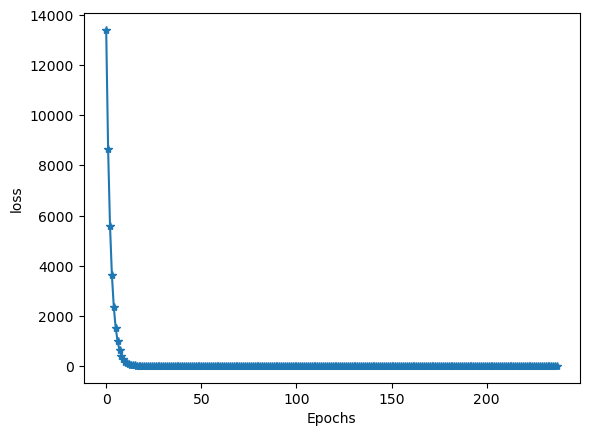

In [20]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()



### Plot loss vs. each theta

In [54]:
array=np.array(theats_arr)
print (array.shape)                                  ##########important 
array=array.reshape((len(theats_arr),n_1))
print (array.shape)                                  
print (array)


(238, 4, 1)
(238, 4)
[[0.         0.         0.         0.        ]
 [0.0016204  0.130758   0.131472   0.1346708 ]
 [0.00292321 0.2358829  0.23716984 0.24296626]
 [0.00397067 0.32039811 0.32214459 0.33005527]
 [0.00481281 0.38834259 0.39045742 0.40009371]
 [0.00548989 0.44296378 0.44537365 0.45642307]
 [0.00603424 0.48687269 0.48951865 0.50172994]
 [0.00647187 0.52216865 0.52500331 0.53817446]
 [0.00682371 0.55053957 0.55352483 0.5674934 ]
 [0.00710656 0.57334259 0.57644781 0.59108318]
 [0.00733394 0.59166885 0.59486942 0.61006658]
 [0.00751673 0.60639571 0.60967181 0.62534631]
 [0.00766366 0.61822853 0.62156425 0.6376482 ]
 [0.00778176 0.62773449 0.63111702 0.64755583]
 [0.00787668 0.63536958 0.63878864 0.65553839]
 [0.00795297 0.64150044 0.64494776 0.66197315]
 [0.00801426 0.64642188 0.6498908  0.66716344]
 [0.00806351 0.6503709  0.65385609 0.67135313]
 [0.00810308 0.65353807 0.65703523 0.67473832]
 [0.00813485 0.65607662 0.65958229 0.67747665]
 [0.00816036 0.65810974 0.66162115 0.67

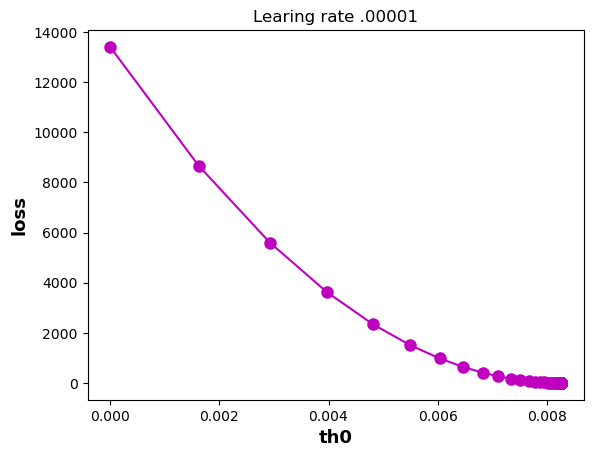

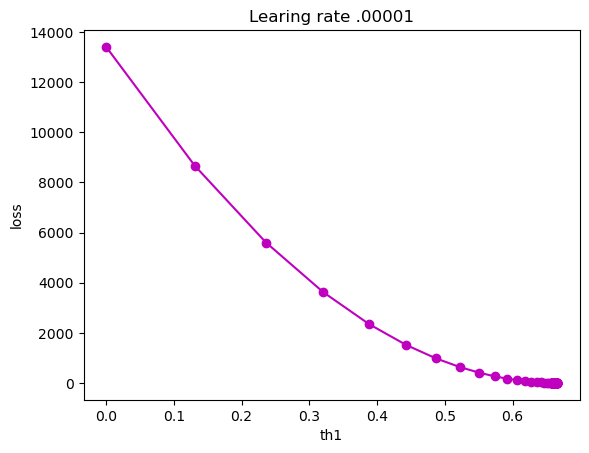

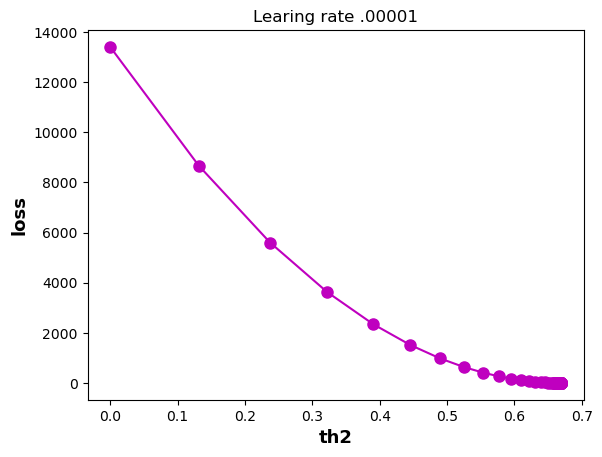

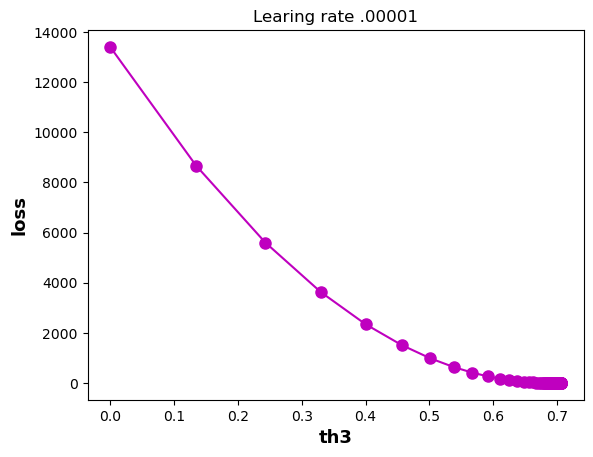

In [62]:
plt.figure()
plt.plot(array[:,0],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th0',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')
plt.figure()
plt.plot(array[:,1],loss,'mo-',)
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th2',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')
plt.figure()
plt.plot(array[:,3],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th3',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')

plt.show()

- Use <b>learning rate = 0.0001</b> and see the difference in learning curves and <b>r2_score</b>.
- You can also try larger learning rate i.e. <b>0.001</b> and see how the optimizer diverges and <b>r2_score</b>.

In [98]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

Y=Y.reshape(-1,1)
X=data[:,0:3]
X= np.hstack(                 (   np.ones(     (X.shape[0], 1)   )  , X      )   )
m=data.shape[0] 

alpha=0.0001
max_iter=10000
grad_check=0.1
conv_check=0.001
th=np.zeros((4,1))

loss=[]
theats_arr=[]

for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=X@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)
    print(f"J = \n{j}")
    loss.append(j)
    grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    th=th-(alpha*grad)
    print(f"new_theats = \n{th}")
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]
****************** Iteration  1 ******************** 

 h(x) = 
[[301.650244]
 [362.560348]
 [357.234064]
 [389.057244]
 [276.510624]
 [203.864004]
 [291.22502 ]
 [215.899264]
 [338.842264]
 [313.855728]
 [280.579308]
 [276.659996]
 [369.069972]
 [306.802308]
 [292.564588]
 [367.915192]
 [292.187588]
 [349.498828]
 [351.854372]
 [314.82572 ]
 [341.507404]
 [340.132136]
 [325.5993


Error Vector:
[[ 1.7381637 ]
 [ 0.29442034]
 [ 2.27942698]
 [ 2.86572509]
 [-0.84336915]
 [ 3.66844802]
 [ 0.23316124]
 [-3.85823983]
 [-1.28257909]
 [-2.27666123]
 [ 2.57293939]
 [ 0.92732383]
 [ 3.97056496]
 [ 3.79266114]
 [ 2.03477036]
 [-3.68402562]
 [ 1.10721783]
 [-3.80395935]
 [ 2.06806999]
 [ 1.23091081]
 [-2.0507659 ]
 [-0.86057587]
 [-8.34309487]
 [ 5.19108307]
 [-0.20955221]]

j = 4.616563585197668

Gradient Vector:
[[ 0.27048255]
 [22.29122171]
 [22.14210581]
 [13.40178414]]

Gradient Vector Norm:
34.1592212092051

New Thetas : [[0.007828  ]
 [0.60793688]
 [0.60959196]
 [0.80190911]]

****************** Iteration 160 ********************

h(x):[[153.29776051]
 [184.76759781]
 [181.75889884]
 [198.30069184]
 [140.7539275 ]
 [104.374714  ]
 [148.81227944]
 [110.83255788]
 [173.22792154]
 [161.27428063]
 [143.16627515]
 [141.52816134]
 [187.43092331]
 [155.34156357]
 [149.61253347]
 [187.7829171 ]
 [147.67612133]
 [178.69153916]
 [178.55291747]
 [159.77003902]
 [174.45538087]


****************** Iteration 332 ********************

h(x):[[153.22901953]
 [185.01253582]
 [181.80936633]
 [198.62577835]
 [140.7990411 ]
 [104.86272365]
 [149.36523391]
 [111.66573082]
 [173.86270886]
 [162.48845795]
 [143.51917642]
 [142.1241441 ]
 [187.21191364]
 [154.79464948]
 [150.24682674]
 [188.25876637]
 [146.9286866 ]
 [179.45015614]
 [178.25069924]
 [159.51315967]
 [175.05484775]
 [174.11942861]
 [166.65202437]
 [153.0422291 ]
 [191.31820648]]

Error Vector:
[[ 1.22901953]
 [ 0.01253582]
 [ 1.80936633]
 [ 2.62577835]
 [-1.2009589 ]
 [ 3.86272365]
 [ 0.36523391]
 [-3.33426918]
 [-1.13729114]
 [-1.51154205]
 [ 2.51917642]
 [ 1.1241441 ]
 [ 3.21191364]
 [ 2.79464948]
 [ 2.24682674]
 [-3.74123363]
 [-0.0713134 ]
 [-3.54984386]
 [ 1.25069924]
 [ 0.51315967]
 [-1.94515225]
 [-0.88057139]
 [-8.34797563]
 [ 4.0422291 ]
 [-0.68179352]]

j = 3.862774794052135

Gradient Vector:
[[ 0.04822044]
 [ 2.59578614]
 [ 1.8476829 ]
 [-4.37524307]]

Gradient Vector Norm:
5.412680935221462

New


Error Vector:
[[ 1.06458328]
 [-0.01751154]
 [ 1.67863405]
 [ 2.66447432]
 [-1.33185482]
 [ 4.06483481]
 [ 0.6162275 ]
 [-2.84266323]
 [-0.90543253]
 [-0.8817567 ]
 [ 2.62493633]
 [ 1.37169357]
 [ 2.89416702]
 [ 2.28235736]
 [ 2.54401769]
 [-3.61455964]
 [-0.72724047]
 [-3.17280144]
 [ 0.8931502 ]
 [ 0.20790643]
 [-1.69104419]
 [-0.74270624]
 [-8.17157714]
 [ 3.45155137]
 [-0.82463965]]

j = 3.510305504422076

Gradient Vector:
[[ 0.05738985]
 [ 2.11285645]
 [ 1.14969926]
 [-3.17752446]]

Gradient Vector Norm:
3.985715249346609

New Thetas : [[0.0062548 ]
 [0.52027258]
 [0.54514327]
 [0.95288231]]

****************** Iteration 494 ********************

h(x):[[153.06378753]
 [184.98226678]
 [181.67795935]
 [198.66469335]
 [140.66737025]
 [105.0658187 ]
 [149.61760222]
 [112.16002744]
 [174.09569498]
 [163.12146032]
 [143.62549992]
 [142.37293847]
 [186.89250504]
 [154.27965839]
 [150.54561384]
 [188.38605697]
 [146.26925794]
 [179.82928237]
 [177.89130081]
 [159.20634484]
 [175.31033495

In [50]:
r2_score(Y,h)

0.9879310084690472

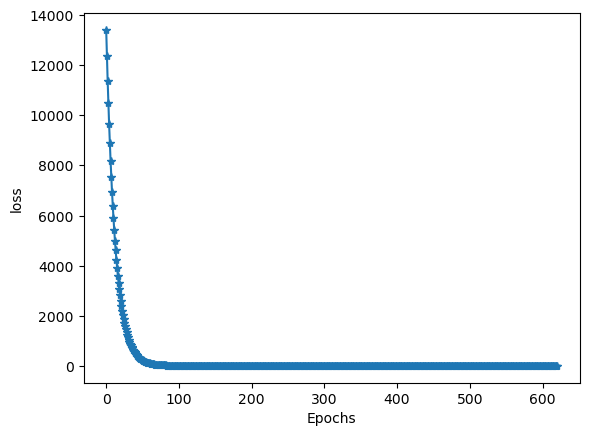

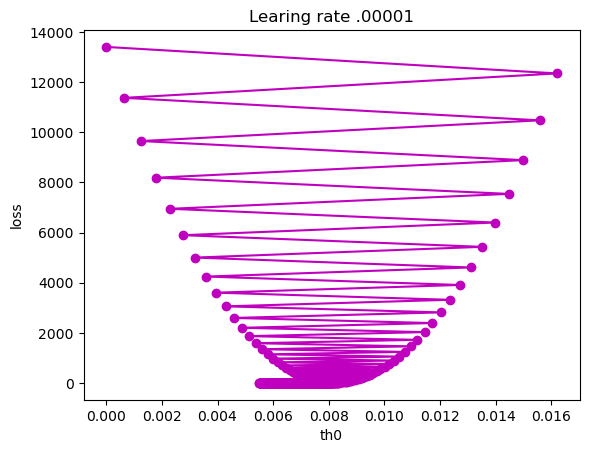

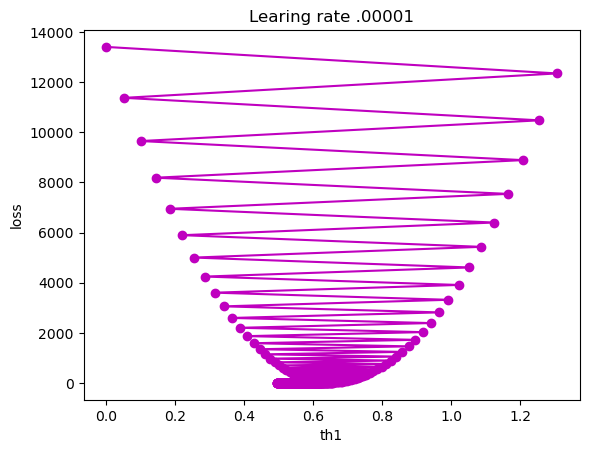

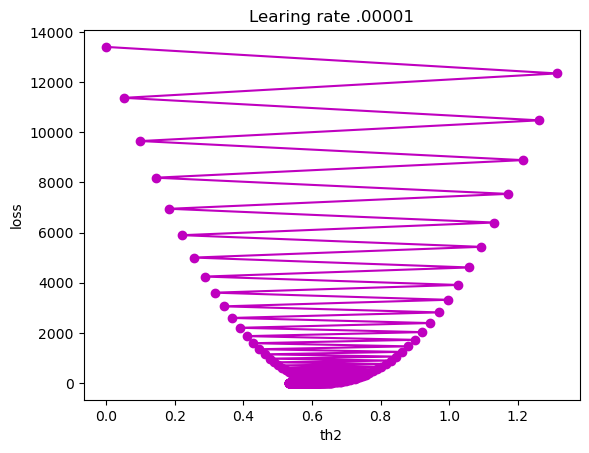

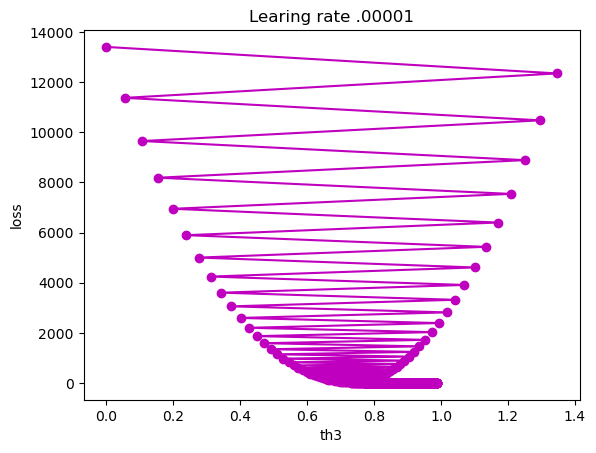

In [51]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

array=np.array(theats_arr)
plt.figure()
plt.plot(array[:,0],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th0')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,1],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th2')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,3],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th3')
plt.ylabel('loss')

plt.show()

In [ ]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

Y=Y.reshape(-1,1)
X=data[:,0:3]
X= np.hstack(                 (       np.ones(     (X.shape[0], 1)   )  , X      )                    )
m=data.shape[0] 
n_1=data.shape[1]
alpha=0.001
max_iter=8000
grad_check=0.1
conv_check=0.001
th=np.zeros((4,1))

loss=[]
theats_arr=[]

for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=X@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)
    print(f"J = \n{j}")
    loss.append(j)
    grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    th=th-(alpha*grad)
    print(f"new_theats = \n{th}")
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[ 0.16204]
 [13.0758 ]
 [13.1472 ]
 [13.46708]]
****************** Iteration  1 ******************** 

 h(x) = 
[[3016.50244]
 [3625.60348]
 [3572.34064]
 [3890.57244]
 [2765.10624]
 [2038.64004]
 [2912.2502 ]
 [2158.99264]
 [3388.42264]
 [3138.55728]
 [2805.79308]
 [2766.59996]
 [3690.69972]
 [3068.02308]
 [2925.64588]
 [3679.15192]
 [2921.87588]
 [3494.98828]
 [3518.54372]
 [3148.2572 ]
 [3415.07404]
 [3401.32136]
 [3255.993

C:\Users\ALL IN ONE\AppData\Local\Temp\ipykernel_6976\69640284.py:40: RuntimeWarning: invalid value encountered in scalar subtract
  if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
C:\Users\ALL IN ONE\AppData\Local\Temp\ipykernel_6976\69640284.py:27: RuntimeWarning: overflow encountered in matmul
  grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
C:\Users\ALL IN ONE\AppData\Local\Temp\ipykernel_6976\69640284.py:49: RuntimeWarning: invalid value encountered in subtract
  th=th-(alpha*grad)


J = 
inf
grad = [[1.15878998e+270]
 [9.35272054e+271]
 [9.40418959e+271]
 [9.62352907e+271]]
grad_norm = 
inf
new_theats = 
[[-1.09966015e+267]
 [-8.87547719e+268]
 [-8.92431991e+268]
 [-9.13246711e+268]]
****************** Iteration  212 ******************** 

 h(x) = 
[[-2.04690043e+271]
 [-2.46018894e+271]
 [-2.42406259e+271]
 [-2.63998584e+271]
 [-1.87629761e+271]
 [-1.38331466e+271]
 [-1.97611753e+271]
 [-1.46496734e+271]
 [-2.29921979e+271]
 [-2.12963216e+271]
 [-1.90389039e+271]
 [-1.87727673e+271]
 [-2.50439424e+271]
 [-2.08188836e+271]
 [-1.98520116e+271]
 [-2.49651066e+271]
 [-1.98272894e+271]
 [-2.37153185e+271]
 [-2.38758156e+271]
 [-2.13631571e+271]
 [-2.31731265e+271]
 [-2.30798481e+271]
 [-2.20937544e+271]
 [-2.06376995e+271]
 [-2.54970190e+271]]
E(x) = 
[[-2.04690043e+271]
 [-2.46018894e+271]
 [-2.42406259e+271]
 [-2.63998584e+271]
 [-1.87629761e+271]
 [-1.38331466e+271]
 [-1.97611753e+271]
 [-1.46496734e+271]
 [-2.29921979e+271]
 [-2.12963216e+271]
 [-1.90389039e+271]


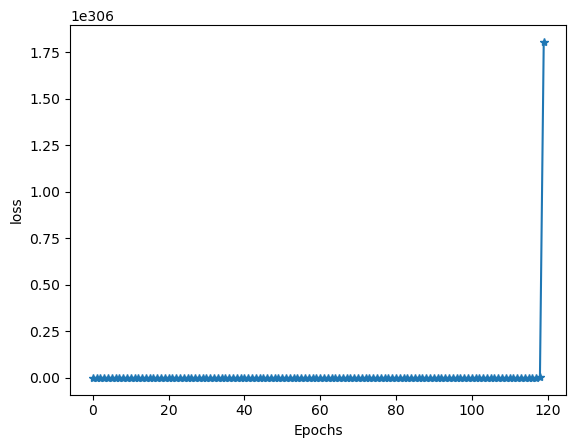

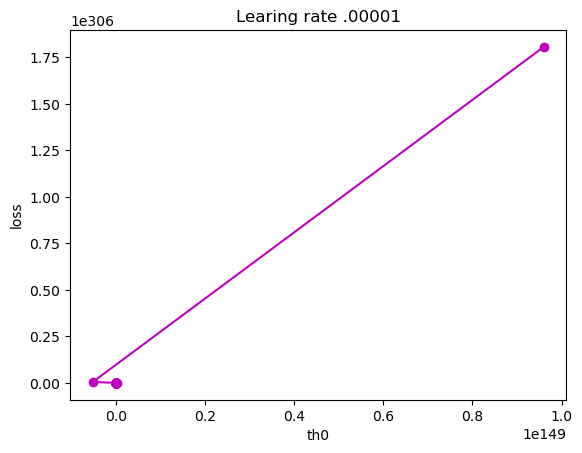

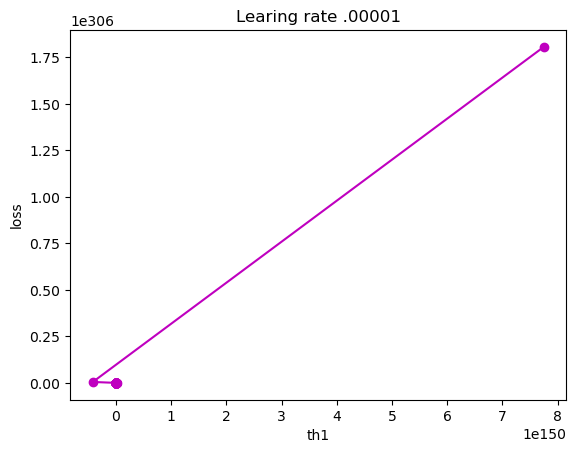

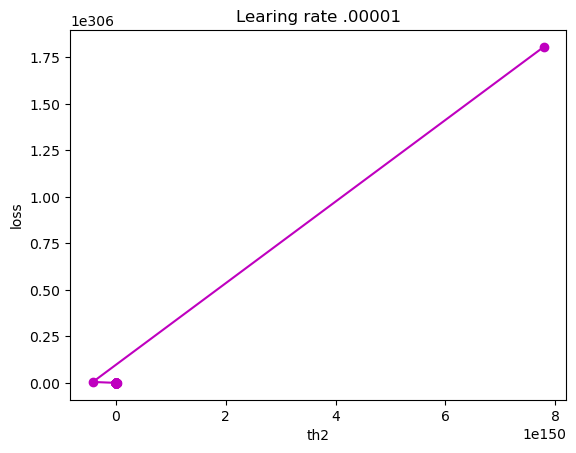

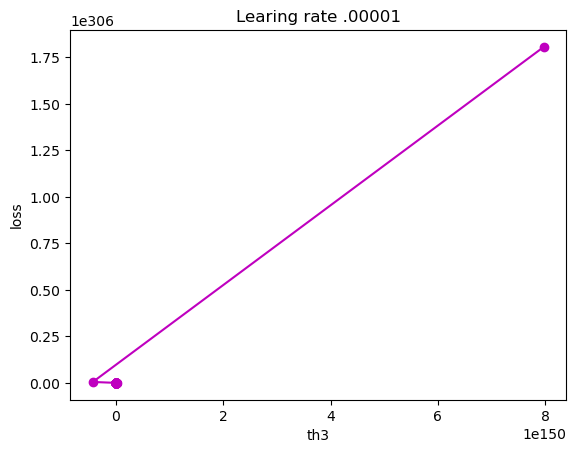

In [106]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

array=np.array(theats_arr)
plt.figure()
plt.plot(array[:,0],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th0')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,1],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th2')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,3],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th3')
plt.ylabel('loss')

plt.show()

## Optional Part: Make all as funtions:
### You can modify the implementation to be a function taking all hyperparameters and return all needed outputs.
### You can also make your plotting using functions taking the outputs and return the learning curves.
### This will make your life easy when you want to try different values of hyperparametrs.

#### Use your previous code and create a function to perform GD for Muli-variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations, stop conditions values.
#### The function should return the following:
##### All Theta values till converge, and equivellant Losses.

In [128]:

    

def DG_Muli_variable_linear_regression(X,Y,alpha=.001,max_iter=1000,grad_check=.001,conv_check=.001):
    
    m=X.shape[0]
    onesArray=   np.ones(  (m, 1)   )
    X= np.hstack(  ( np.ones(  (m, 1)   )  , X    )  )
    n_1=X.shape[1]
    th=np.zeros((n_1,1))
    loss=[]
    theats_arr=[]
    for i in range(max_iter):
        print(f"****************** Iteration  {i} ******************** \n")
        theats_arr.append(th)
        h=X@th                                  #  25*4   @ 4*1   ==>    25*1
        e=h-Y                                   #  25*1 -   25*1  ==>25*1 
        print(f"Erorr = \n{e}")
        j=np.linalg.norm(e)**2/(2*m)
        print(f"J = \n{j}")
        loss.append(j)
        grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
        print(f"grad = {grad}")
        grad_norm=np.linalg.norm(grad)
        print(f"grad_norm = \n{grad_norm}")
        if grad_norm<grad_check:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i+1} epochs \n ")
            print(f"theta_Opt :\n{th}\n")
            print(f"Error Vector: :\n{e}\n")
            print(f"Cost  :\n{j}\n")
            print(f" y_predict:\n{h}\n")
            print(f" y_actual:\n{Y}\n")
            break 
        if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i+1} epochs \n ")
            print(f"theta_Opt :\n{th}\n")
            print(f"Error Vector: :\n{e}\n")
            print(f"Cost  :\n{j}\n")
            print(f" y_predict:\n{h}\n")
            print(f" y_actual:\n{Y}\n")
            break
        th=th-(alpha*grad)
        print(f"new_theats = \n{th}")
    return theats_arr,loss
        
theats_arr,loss=DG_Muli_variable_linear_regression(X,Y,.00001,10000,.01,.001,)
    

****************** Iteration  0 ******************** 

Erorr = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.0016204]
 [0.130758 ]
 [0.131472 ]
 [0.1346708]]
****************** Iteration  1 ******************** 

Erorr = 
[[-121.8349756]
 [-148.7439652]
 [-144.2765936]
 [-157.0942756]
 [-114.3489376]
 [ -80.6135996]
 [-119.877498 ]
 [ -93.4100736]
 [-141.1157736]
 [-132.6144272]
 [-112.9420692]
 [-113.3340004]
 [-147.0930028]
 [-121.3197692]
 [-118.7435412]
 [-155.2084808]
 [-117.7812412]
 [-148.0501172]
 [-141.8145628]
 [-127.517428 ]
 [-142.8492596]
 [-140.9867864]
 [-142.4400616]
 [-118.5869688]
 [-154.4249896]]
J = 
8668.481648916413
grad = [[  -130.28089594]
 [-10512.48957462]
 [-1


Error Vector:
[[ 1.87309229e+00]
 [ 8.67974902e-03]
 [ 2.25383147e+00]
 [ 2.53084340e+00]
 [-9.19143162e-01]
 [ 3.08674094e+00]
 [-3.48295216e-01]
 [-4.73855133e+00]
 [-2.02854428e+00]
 [-3.68618711e+00]
 [ 2.19457632e+00]
 [ 2.38946485e-01]
 [ 4.25094039e+00]
 [ 4.43520580e+00]
 [ 1.34977489e+00]
 [-4.22532388e+00]
 [ 1.95315726e+00]
 [-4.59212582e+00]
 [ 2.45318997e+00]
 [ 1.56827131e+00]
 [-2.68775919e+00]
 [-1.39976442e+00]
 [-8.82487165e+00]
 [ 6.04185261e+00]
 [-2.90567177e-01]]

j = 5.699293882010793

Gradient Vector:
[[ 0.01991879]
 [ 3.97274006]
 [ 4.44159639]
 [-8.20154953]]

Gradient Vector Norm:
10.137862372765087

New Thetas : [[0.00823727]
 [0.66059823]
 [0.66338057]
 [0.70093915]]

****************** Iteration 170 ********************

h(x):[[153.87278987]
 [185.00870374]
 [182.25363507]
 [198.53087816]
 [141.08076617]
 [104.0871029 ]
 [148.65199181]
 [110.26201492]
 [172.97187177]
 [160.31478247]
 [143.19471295]
 [141.23934748]
 [188.25048944]
 [156.43450099]
 [149.350

In [145]:
def calc_r2(Y,theats_arr):
    h=X@theats_arr[len(theats_arr)-1]
    return r2_score(Y,h)

x=calc_r2(Y,theats_arr)
print(x)

0.9797103568402049


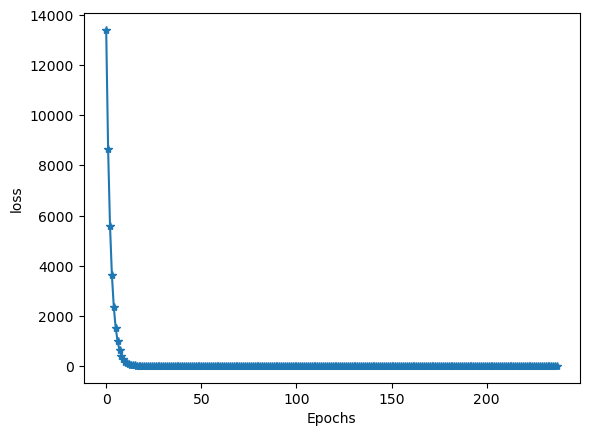

In [151]:
def plot_loss(loss):
    plt.figure()
    plt.plot(loss,'*-')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.show()

plot_loss(loss)
    

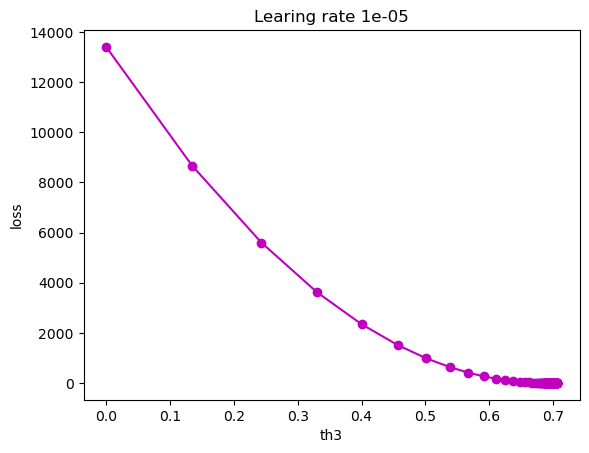

In [185]:
def plot_theta_loss(theats_arr,loss,alpha,theata):
    array=np.array(theats_arr)
    plt.figure()
    plt.plot(array[:,theata],loss,'mo-')
    plt.title(f"Learing rate {alpha}")
    plt.xlabel(f"th{theata}")
    plt.ylabel('loss')
    plt.show()
    
plot_theta_loss(theats_arr,loss,0.00001,3)